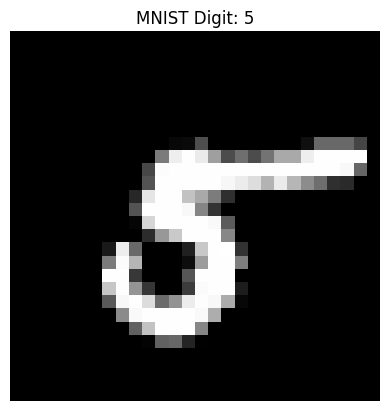

Response: {'predictions': [5]}


In [2]:
#Testing the deployed mnist model
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Load MNIST dataset
mnist = fetch_openml("mnist_784", version=1, as_frame=False)

# Select the first image and label
image = mnist.data[-2].reshape(28, 28)  # Reshape to 28x28
label = mnist.target[-2]  # Get the label

# Display the image
plt.imshow(image, cmap="gray")
plt.title(f"MNIST Digit: {label}")
plt.axis("off")
plt.show()

# Flatten the image and normalize pixel values (0-1)
image = image.reshape(1, 784) / 255.0

# Define the input data
input_data = {"data": image.tolist()}  

# Scoring URI (Replace with your actual URI)
scoring_uri = "http://e98d02c1-f89c-474e-9462-ea46a3c384d3.eastus2.azurecontainer.io/score"

# Set headers
headers = {"Content-Type": "application/json"}

# Send POST request
response = requests.post(scoring_uri, data=json.dumps(input_data), headers=headers)

# Print response
print("Response:", response.json())
